# <center>  Animal Bites Analysis <center>

From 2007 to 2017, the Department of Health reported an increasing number of Animal Bites in the country. Because of this, I have chosen a dataset containing animal bites record. Although the data gathered here are from Kentucky, USA, I think that the information would still be relevant especially for pet (dog) owners. 

(source: https://doh.gov.ph/national-rabies-prevention-and-control-program)

### Key Insights
1. Which animals are most likely to bite humans?
2. What are the most aggressive breed of dogs? 
3. Which gender of animals are mostly likely to bite humans?

### I. Importing and setting up of data

For the first step, I set the variables up and imported the dataset.

In [1]:
import numpy  as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
import os
import csv

os.chdir("C:\\Users\\maegr\Documents\Maymay\DataScience\modules")

with open("Health_AnimalBites.csv", "r") as animal_data:
    animal_data = pd.read_csv('Health_AnimalBites.csv')

### II. Analyzing the columns and initial data description
After importing the dataset, I checked the columns included and the initial description of the data. This is for me to identify which information is needed and which should be removed.

In [3]:
animal_data.columns 

Index(['bite_date', 'SpeciesIDDesc', 'BreedIDDesc', 'GenderIDDesc', 'color',
       'vaccination_yrs', 'vaccination_date', 'victim_zip', 'AdvIssuedYNDesc',
       'WhereBittenIDDesc', 'quarantine_date', 'DispositionIDDesc',
       'head_sent_date', 'release_date', 'ResultsIDDesc'],
      dtype='object')

#### Analysis:
The dataset contains the following information: 

- bite_date: The date the bite occurred
- SpeciesIDDesc: The species of animal that did the biting
- BreedIDDesc: Breed (if known)
- GenderIDDesc: Gender (of the animal)
- color: color of the animal
- vaccination_yrs: how many years had passed since the last vaccination
- vaccination_date: the date of the last vaccination
- victim_zip: the zipcode of the victim
- AdvIssuedYNDesc: whether advice was issued
- WhereBittenIDDesc: Where on the body the victim was bitten
- quarantine_date: whether the animal was quarantined
- DispositionIDDesc: whether the animal was released from quarantine
- headsentdate: the date the animal’s head was sent to the lab
- release_date: the date the animal was released
- ResultsIDDesc: results from lab tests (for rabies)

In [4]:
animal_data.describe()

,vaccination_yrs
count,3738.000000
mean,1.452113
std,0.848416
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,11.000000


#### Conclusions:
1. Based on the output, there are 3738 records on this dataset. 
2. The average number of years that passed by since the last vaccination is around 1.45 years. 
3. The maximum number of years that passed by since the last vaccination is 11 years, while the minimum number of year is 1 year only.

### II. Transforming the dataset
I've decided to keep the important information that would answer my key insights and remove the unnecessary information from the dataset

In [5]:
animal_data.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [6]:
del animal_data["color"]

In [7]:
del animal_data["vaccination_yrs"]

In [8]:
del animal_data["vaccination_date"]

In [9]:
del animal_data["AdvIssuedYNDesc"]

In [10]:
del animal_data["quarantine_date"]

In [11]:
del animal_data["victim_zip"]

In [12]:
del animal_data["DispositionIDDesc"]

In [13]:
del animal_data["release_date"]

In [14]:
del animal_data["head_sent_date"]

In [15]:
del animal_data["ResultsIDDesc"]

In [16]:
animal_data.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,WhereBittenIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,BODY
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BODY
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,BODY
3,1988-10-02 00:00:00,DOG,NaN,MALE,BODY
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BODY


### III. Identifying the species and the number of bites
The graph below shows the animal species and the number of times each species has bitten humans

[7029, 1568, 237, 27, 11, 3, 5, 1, 4]


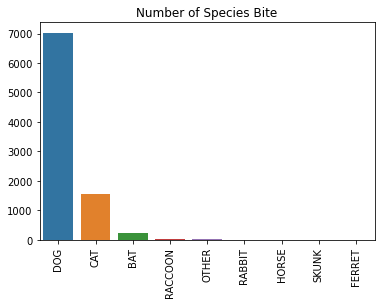

In [17]:
species = animal_data.SpeciesIDDesc
species = species.dropna()
speciesOfAnimal = species.unique()
animal_list = []
for  i in speciesOfAnimal:
    animal_list.append(len(species[species==i]))
ax = sns.barplot(x=speciesOfAnimal, y =animal_list)
plt.title('Number of Species Bite')
plt.xticks(rotation=90)
print(animal_list)

#### Conclusions:
1. There is a total of 8855 animal bites
2. Among the species present, dogs have bitten humans the most, with 7029 bites
3. Dogs are followed by cats, with around 1568 bites
4. There is only one recorded instance of skunk biting humans

### IV. Most aggresive breeds
The graph below shows the top 10 most aggressive breeds of animals

Index(['PIT BULL', 'GERM SHEPHERD', 'LABRADOR RETRIV', 'BOXER', 'CHICHAUHUA',
       'SHIH TZU', 'BEAGLE', 'ROTTWEILER', 'AAUST. TERR.', 'DACHSHUND'],
      dtype='object')


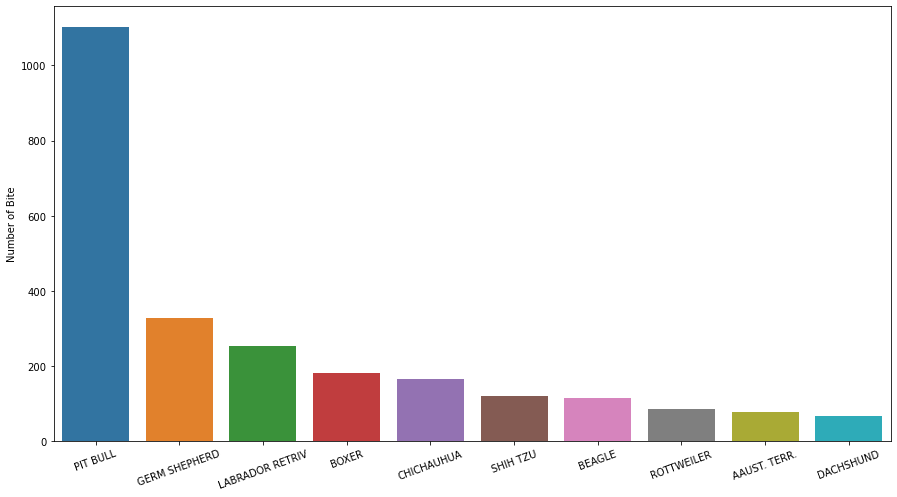

In [18]:
count = animal_data.BreedIDDesc.value_counts()
plt.figure(figsize=(15,8))
ax = sns.barplot(x=count[0:10].index,y=count[0:10])
plt.xticks(rotation=20)
plt.ylabel("Number of Bite")
plt.savefig('graph.png')

print(count[0:10].index)

#### Conclusions:
1. There is a total of 8855 animal bites
2. Among the species present, dogs have bitten humans the most, with 7029 bites
3. Dogs are followed by cats, with around 1568 bites
4. There is only one recorded instance of skunk biting humans

### V. Number of bites by gender

MALE      3832
FEMALE    2016
Name: GenderIDDesc, dtype: int64


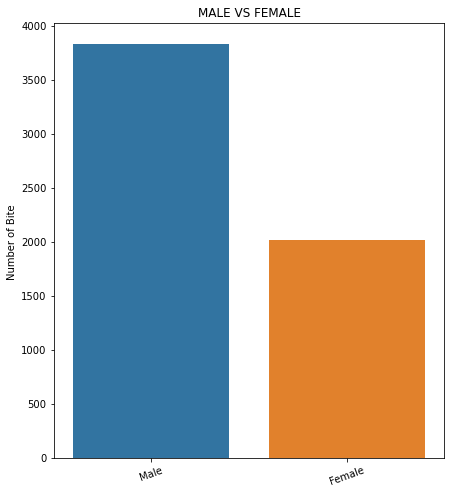

In [19]:
gender = ['Male','Female']
count_gender = animal_data.GenderIDDesc.value_counts()
plt.figure(figsize= (7,8))
x = sns.barplot(x=gender, y= count_gender[0:2])
plt.ylabel('Number of Bite ')
plt.xticks(rotation = 20)
plt.title('MALE VS FEMALE')
print(count_gender[0:2])

#### Conclusions:
1. There is a total of 8855 animal bites
2. Among the species present, dogs have bitten humans the most, with 7029 bites
3. Dogs are followed by cats, with around 1568 bites
4. There is only one recorded instance of skunk biting humans

## General Conclusions
1. Which animals are most likely to bite humans?
According to the dataset, **dogs are most likely to bite humans**. Personally, I think it makes sense since people have domesticated dogs and have taken them as pets. Therefore, they have the most human interactions than other species. Aside from dogs, cats are also likely to bite humans. Similar to dogs, many people have cats as their pets so they also have a lot of human interactions. On the other hand, what surprised me is the number of times bats have bitten humans since they generally do not attack people.

2. What are the most aggressive breed of dogs? 
The **most aggressive breed is the pitbull**, followed by german shepherd. To be honest, I think both of them are scary-looking
![Pitbull](https://spiritdogtraining.com/wp-content/uploads/2021/01/pitbull-harness.jpg)
![German Shepherd](https://spiritdogtraining.com/wp-content/uploads/2021/02/shepherds.jpg)

3. Which gender of animals are mostly likely to bite humans? **Male** animals are most likely to bite humans than female animals. 

#### Others
I think it would be interesting to also record the animal bites inflicted by snakes (since some of them are venomous), crocodiles (they have the strongest bites), monkeys, and others. However, I do hope that DOH would have a similar dataset that we could analyze in the future.